## Let's import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/world-oscars-award-dataset2024/the_oscar_awards.csv')
print(df.head())
print(df.columns)
print(df.dtypes)

   year_film  year_ceremony  ceremony category                 name  \
0       1927           1928         1    ACTOR  Richard Barthelmess   
1       1927           1928         1    ACTOR        Emil Jannings   
2       1927           1928         1  ACTRESS       Louise Dresser   
3       1927           1928         1  ACTRESS         Janet Gaynor   
4       1927           1928         1  ACTRESS       Gloria Swanson   

               film  winner  
0         The Noose   False  
1  The Last Command    True  
2   A Ship Comes In   False  
3        7th Heaven    True  
4    Sadie Thompson   False  
Index(['year_film', 'year_ceremony', 'ceremony', 'category', 'name', 'film',
       'winner'],
      dtype='object')
year_film         int64
year_ceremony     int64
ceremony          int64
category         object
name             object
film             object
winner             bool
dtype: object


## Let's analyses only winners first

In [2]:
# Creating a dataframe with only winners
winners = df[df['winner'] == True]
print(winners.head(3))

   year_film  year_ceremony  ceremony       category                     name  \
1       1927           1928         1          ACTOR            Emil Jannings   
3       1927           1928         1        ACTRESS             Janet Gaynor   
6       1927           1928         1  ART DIRECTION  William Cameron Menzies   

               film  winner  
1  The Last Command    True  
3        7th Heaven    True  
6         The Dove;    True  


## What is the TOP 10 most awarded ? 

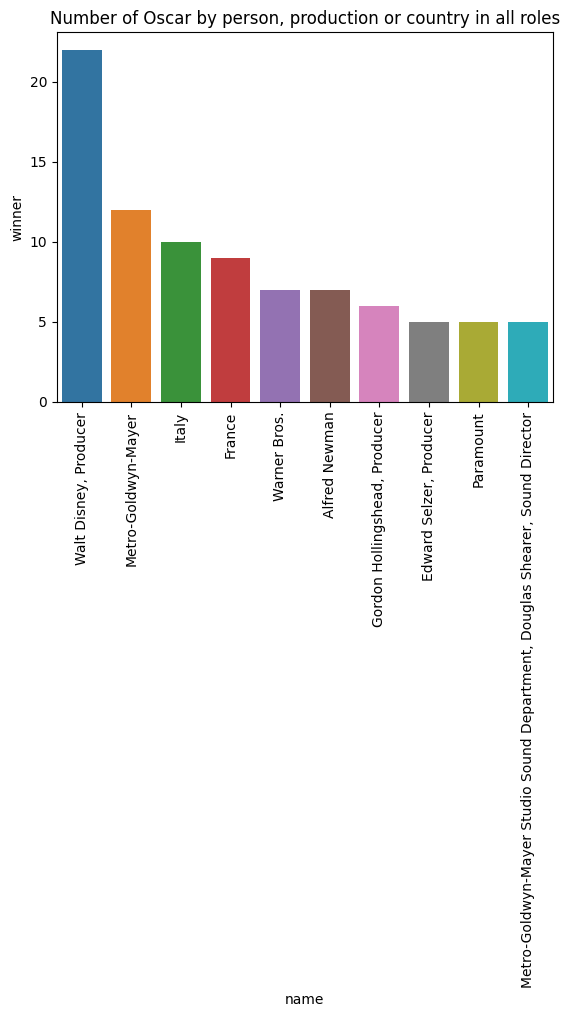

In [3]:
most_award = winners.groupby('name')['winner'].count().sort_values(ascending=False).reset_index()

sns.barplot(data = most_award.head(10), x = 'name', y='winner')
plt.xticks(rotation=90)
plt.title('Number of Oscar by person, production or country in all roles')
plt.show()

## Most awarded by category

In [4]:
most_award_cat = winners.groupby(['category', 'name'])['winner'].count().sort_values(ascending=False)
print(most_award_cat.head(10))

category                  name                                                                        
SHORT SUBJECT (Cartoon)   Walt Disney, Producer                                                           12
FOREIGN LANGUAGE FILM     Italy                                                                           10
                          France                                                                           9
SHORT SUBJECT (Two-reel)  Walt Disney, Producer                                                            5
SOUND RECORDING           Metro-Goldwyn-Mayer Studio Sound Department, Douglas Shearer, Sound Director     5
MUSIC (Original Score)    John Williams                                                                    4
FOREIGN LANGUAGE FILM     Spain                                                                            4
COSTUME DESIGN            Colleen Atwood                                                                   4
CINEMATOGRAPHY (Color)   

## Let's analyse most awarded actors in a leading role

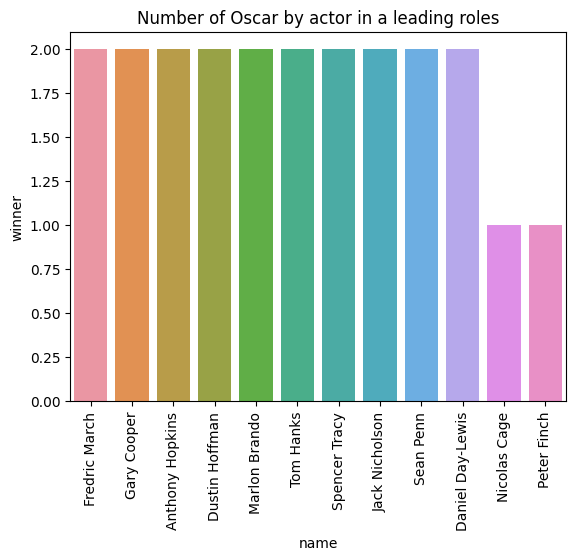

In [5]:
# Only actor in a leading role
actors = winners[(winners['category'] == 'ACTOR') | (winners['category'] == 'ACTOR IN A LEADING ROLE')]
most_award_actor = actors.groupby('name')['winner'].count().sort_values(ascending=False).reset_index()

sns.barplot(data = most_award_actor.head(12), x='name', y='winner')
plt.xticks(rotation=90)
plt.title('Number of Oscar by actor in a leading roles')
plt.show()

## Let's add supporting role too

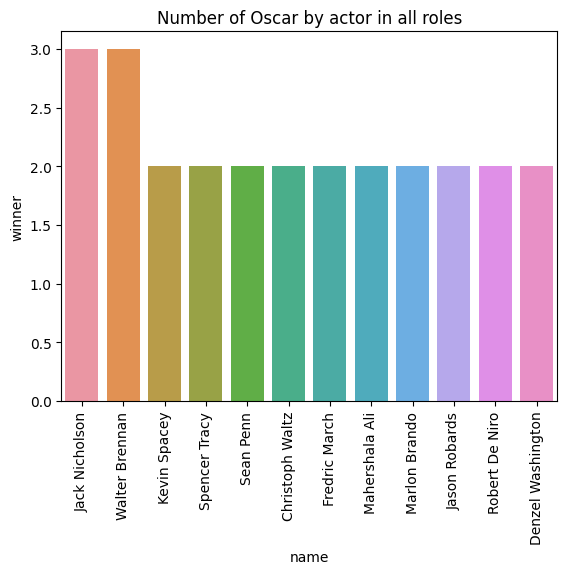

In [6]:
# Adding supporting role
actors_supporting_leading = winners[(winners['category'] == 'ACTOR') | (winners['category'] == 'ACTOR IN A LEADING ROLE') | (winners['category'] == 'ACTOR IN A SUPPORTING ROLE') ]
most_award_actor_with_supporting = actors_supporting_leading.groupby('name')['winner'].count().sort_values(ascending=False).reset_index()

sns.barplot(data = most_award_actor_with_supporting.head(12), x='name', y='winner')
plt.xticks(rotation=90)
plt.title('Number of Oscar by actor in all roles')
plt.show()

## Same for actress

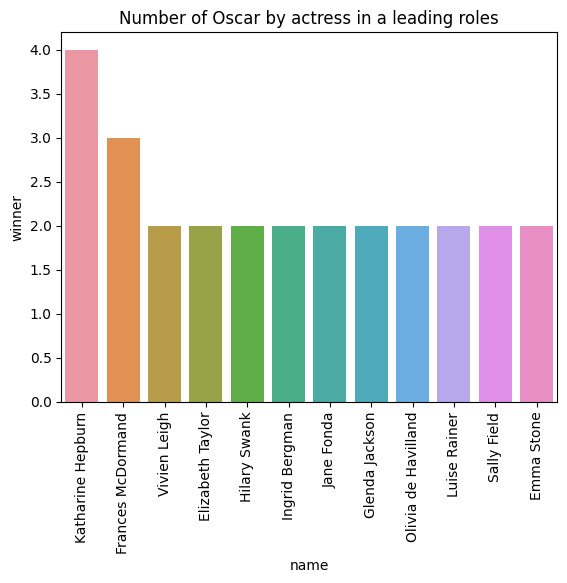

In [7]:
# Only actor in a leading role
actress = winners[(winners['category'] == 'ACTRESS') | (winners['category'] == 'ACTRESS IN A LEADING ROLE')]
most_award_actress = actress.groupby('name')['winner'].count().sort_values(ascending=False).reset_index()

sns.barplot(data = most_award_actress.head(12), x='name', y='winner')
plt.xticks(rotation=90)
plt.title('Number of Oscar by actress in a leading roles')
plt.show()

## Let's add supporting role too

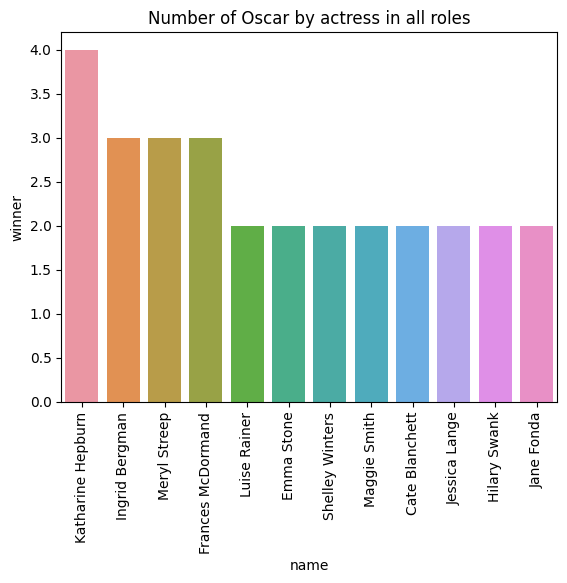

In [8]:
# Adding supporting role
actress_supporting_leading = winners[(winners['category'] == 'ACTRESS') | (winners['category'] == 'ACTRESS IN A LEADING ROLE') | (winners['category'] == 'ACTRESS IN A SUPPORTING ROLE') ]
most_award_actress_with_supporting = actress_supporting_leading.groupby('name')['winner'].count().sort_values(ascending=False).reset_index()

sns.barplot(data=most_award_actress_with_supporting.head(12), x='name', y='winner')
plt.xticks(rotation=90)
plt.title('Number of Oscar by actress in all roles')
plt.show()

# Which movie is the most awarded?

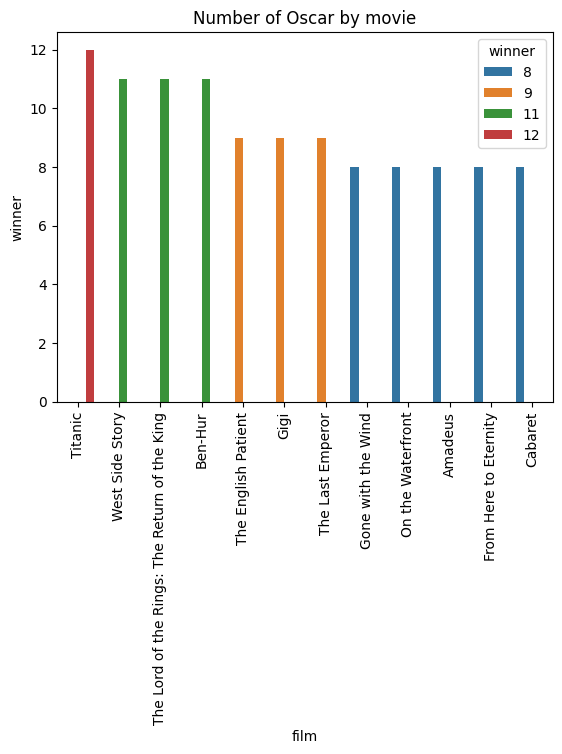

In [9]:
most_award_film = winners.groupby('film')['winner'].sum().sort_values(ascending=False).reset_index()

sns.barplot(data=most_award_film.head(12), x='film', y='winner', hue='winner')
plt.xticks(rotation=90)
plt.title('Number of Oscar by movie')
plt.show()

## Who are the most nominated

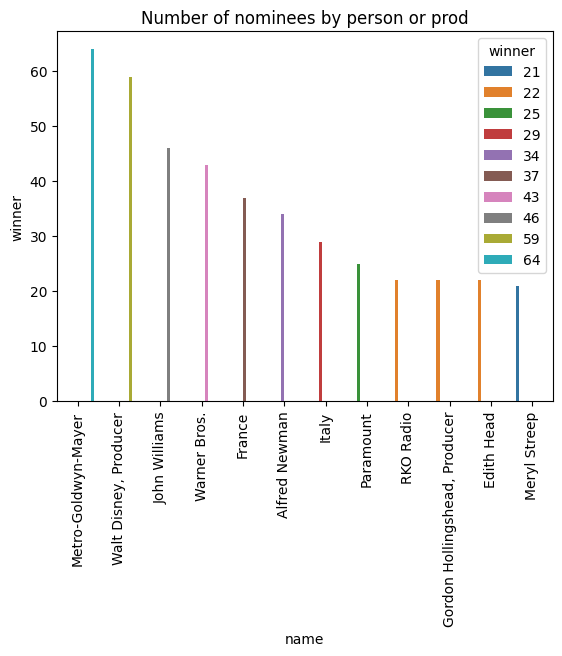

In [10]:
nominees = df.groupby('name')['winner'].count().sort_values(ascending=False).reset_index()

sns.barplot(data=nominees.head(12), x='name', y='winner', hue='winner')
plt.xticks(rotation=90)
plt.title('Number of nominees by person or prod')
plt.show()

## Only actors & Actress

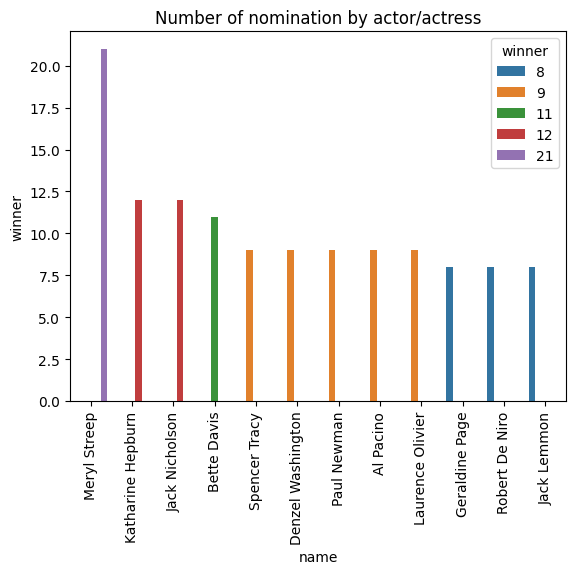

In [11]:
actors_actress = df[(df['category'] == 'ACTRESS') | (df['category'] == 'ACTRESS IN A LEADING ROLE') | (df['category'] == 'ACTRESS IN A SUPPORTING ROLE') | (df['category'] == 'ACTOR') | (df['category'] == 'ACTOR IN A LEADING ROLE') | (df['category'] == 'ACTOR IN A SUPPORTING ROLE')]

nominees_actors = actors_actress.groupby('name')['winner'].count().sort_values(ascending=False).reset_index()

sns.barplot(data=nominees_actors.head(12), x='name', y='winner', hue='winner')
plt.xticks(rotation=90)
plt.title('Number of nomination by actor/actress')
plt.show()